# NLP (Natural Language Processing) with Python

### Imports

In [1]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 11.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data

In [10]:
messages = [line.rstrip() for line in open('/home/jovyan/datafabric/tutorial/spam_utf8.csv')] #please update the path.
print(len(messages))

5575


In [24]:
for message_no, message in enumerate(messages[:3]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's




In [16]:
messages = pd.read_csv('/home/jovyan/datafabric/tutorial/spam_utf8.csv', sep=',', #please update the path.
                           names=["label", "message", "v3", "v4", "v5"])
messages.head()

,label,message,v3,v4,v5
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


## Exploratory Data Analysis

In [17]:
messages.describe()

,label,message,v3,v4,v5
count,5573,5573,50,12,6
unique,3,5170,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [18]:
messages.groupby('label').describe()

message                                                                 \
        count unique                                                top freq   
label                                                                          
ham      4825   4516                             Sorry, I'll call later   30   
spam      747    653  Please call our customer service representativ...    4   
v1          1      1                                                 v2    1   

         v3                                                                 \
      count unique                                                top freq   
label                                                                        
ham      45     39   bt not his girlfrnd... G o o d n i g h t . . .@"    3   
spam      5      4                                        PO Box 5249    2   
v1        0      0                                                NaN  NaN   

         v4                                       v5                       
      count unique                    top freq count unique      top freq  
label                                                                      
ham      10      9                     GE    2     6      5  GNT:-)"    2  
spam      2      1   MK17 92H. 450Ppw 16"    2     0      0      NaN  NaN  
v1        0      0                    NaN  NaN     0      0      NaN  NaN

In [19]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,v3,v4,v5,length
0,v1,v2,NaN,NaN,NaN,2
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49


In [20]:
messages

,label,message,v3,v4,v5,length
0,v1,v2,NaN,NaN,NaN,2
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
...,...,...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161
5569,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37
5570,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57
5571,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125


### Data Visualization

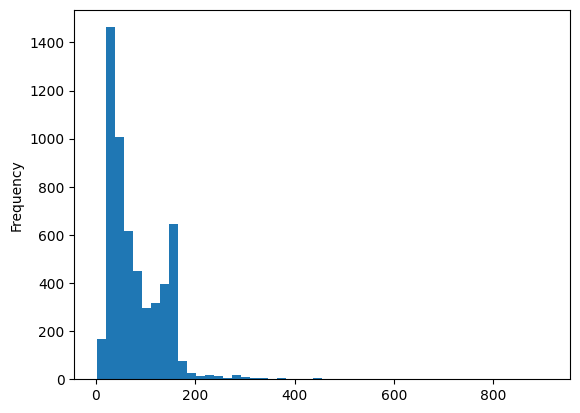

In [21]:
messages['length'].plot(bins=50, kind='hist');

In [22]:
messages.length.describe()

count    5573.000000
mean       80.105150
std        59.695104
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

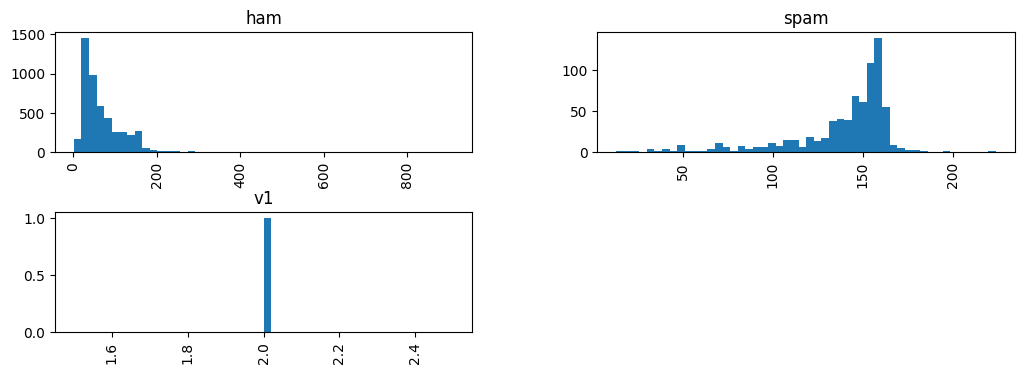

In [23]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4));

## Text Pre-processing

In [24]:
mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [25]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [27]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [29]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
messages.head()

,label,message,v3,v4,v5,length
0,v1,v2,NaN,NaN,NaN,2
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49


In [31]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0                                                 [v2]
1    [Go, jurong, point, crazy, Available, bugis, n...
2                       [Ok, lar, Joking, wif, u, oni]
3    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
4        [U, dun, say, early, hor, U, c, already, say]
Name: message, dtype: object

In [32]:
# Show original dataframe
messages.head()

,label,message,v3,v4,v5,length
0,v1,v2,NaN,NaN,NaN,2
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49


## Vectorization

In [33]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11305


In [34]:
message4 = messages['message'][3]
print(message4)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [35]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 73)	1
  (0, 422)	1
  (0, 429)	1
  (0, 442)	1
  (0, 860)	1
  (0, 1529)	1
  (0, 1808)	2
  (0, 1909)	1
  (0, 2754)	1
  (0, 3882)	1
  (0, 4652)	1
  (0, 5535)	1
  (0, 6244)	2
  (0, 6470)	1
  (0, 9050)	1
  (0, 9091)	1
  (0, 9143)	1
  (0, 10398)	1
  (0, 10570)	1
  (0, 10965)	1
  (0, 11004)	1
(1, 11305)


In [36]:
print(bow_transformer.get_feature_names_out()[4073])
print(bow_transformer.get_feature_names_out()[9570])

VALUED
shades


In [37]:
messages_bow = bow_transformer.transform(messages['message'])

In [38]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5573, 11305)
Amount of Non-Zero occurences:  50194


In [39]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [40]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 73)	0.22530148292327545
  (0, 422)	0.09655957814015752
  (0, 429)	0.21770053859292315
  (0, 442)	0.21770053859292315
  (0, 860)	0.21180478813214076
  (0, 1529)	0.21770053859292315
  (0, 1808)	0.4506029658465509
  (0, 1909)	0.15260224741239434
  (0, 2754)	0.1765322780910631
  (0, 3882)	0.15434494495713846
  (0, 4652)	0.16446411145070872
  (0, 5535)	0.1886737355820859
  (0, 6244)	0.3477758790643801
  (0, 6470)	0.18460086887243252
  (0, 9050)	0.22530148292327545
  (0, 9091)	0.22530148292327545
  (0, 9143)	0.16115713415560878
  (0, 10398)	0.21180478813214076
  (0, 10570)	0.1399045307498735
  (0, 10965)	0.15964693257124865
  (0, 11004)	0.19097269229832803


In [41]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2890424768954527
8.527255919373783


In [42]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5573, 11305)


## Training a model

In [43]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [44]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: spam
expected: spam


## Model Evaluation

In [45]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [46]:
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747
          v1       0.00      0.00      0.00         1

    accuracy                           0.98      5573
   macro avg       0.66      0.62      0.64      5573
weighted avg       0.98      0.98      0.98      5573



/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train Test Split

In [47]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4458 1115 5573


## Creating a Data Pipeline

In [48]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [49]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f6b3bc37ec0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [50]:
predictions = pipeline.predict(msg_test)

In [51]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98       997
        spam       0.72      1.00      0.84       118

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

